<a href="https://colab.research.google.com/github/AmriteshThapa/SENTIMENT-ANALYSIS-WITH-NLP/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📝 Sentiment Analysis on Customer Reviews using TF-IDF & Logistic Regression
# Google Colab Ready Notebook

# 📌 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import re
import string

# For inline plots in Colab
%matplotlib inline


In [ ]:
# Sample dataset
data = {
    'review': [
        "I love this product! It's amazing and works perfectly.",
        "Terrible experience, the item broke after a day.",
        "Absolutely fantastic quality, will buy again.",
        "Not worth the money. Very disappointed.",
        "Exceeded my expectations! Highly recommend.",
        "Worst purchase ever. Waste of money.",
        "Really good, satisfied with the performance.",
        "It stopped working after a week, poor quality."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Positive, 0 = Negative
}

df = pd.DataFrame(data)
df.head()


,review,sentiment
0,I love this product! It's amazing and works pe...,1
1,"Terrible experience, the item broke after a day.",0
2,"Absolutely fantastic quality, will buy again.",1
3,Not worth the money. Very disappointed.,0
4,Exceeded my expectations! Highly recommend.,1


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

df['clean_review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment,clean_review
0,I love this product! It's amazing and works pe...,1,i love this product its amazing and works perf...
1,"Terrible experience, the item broke after a day.",0,terrible experience the item broke after a day
2,"Absolutely fantastic quality, will buy again.",1,absolutely fantastic quality will buy again
3,Not worth the money. Very disappointed.,0,not worth the money very disappointed
4,Exceeded my expectations! Highly recommend.,1,exceeded my expectations highly recommend


In [ ]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
tfidf = TfidfVectorizer(max_features=500)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF matrix shape:", X_train_tfidf.shape)


TF-IDF matrix shape: (6, 36)


In [ ]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

Accuracy: 0.00


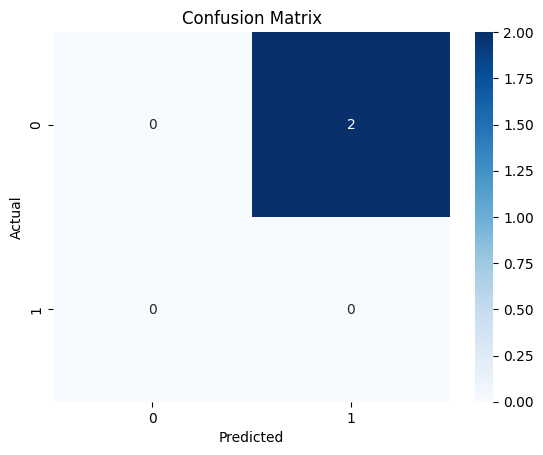

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
y_pred = model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
